<div style="background-color:#e0f7fa; padding:20px; border-left:6px solid teal; border-radius:12px; text-align:center;">
  <h2 style="color:teal; font-weight:bold; font-family:Arial, sans-serif; margin:0;">
     <span style="font-size:28px;">Heart Disease</span>
  </h2>
</div>


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
import seaborn as sns
from sklearn.metrics import accuracy_score
from IPython.display import display

# P1: ĐỌC DỮ LIỆU VÀ XỬ LÝ 

## Đọc dữ liệu

In [3]:
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv('heart_uci.csv', header=None, names=columns)

df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Kiểm tra dữ liệu  

In [4]:
for col in df.columns:
  print(f"Cột: {col}")
  print(df[col].unique())

Cột: age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
Cột: sex
[1. 0.]
Cột: cp
[1. 4. 3. 2.]
Cột: trestbps
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
Cột: chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 20

### => Loại bỏ giá trị ?

## Kiểm tra dữ liệu null

In [5]:
print("Kiểm tra dữ liệu bị thiếu (null values):")
print(df.isnull().sum())

Kiểm tra dữ liệu bị thiếu (null values):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### => Không cần xử lý null

### Kiểm tra giá trị outlier  

In [6]:
print("\nThống kê mô tả các cột số:")
print(df.describe())


Thống kê mô tả các cột số:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
st

## Xử lý missing value

In [7]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

print("Kích thước sau khi làm sạch:", df.shape)
df

Kích thước sau khi làm sạch: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


## Chuyển nhãn về nhị phân

In [8]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("Số dòng sau khi làm sạch:", df.shape[0])
df.head()

Số dòng sau khi làm sạch: 297


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# P2: Chia tập train/test theo 4 tỷ lệ

## 1. Tách dữ liệu thành đặc trưng và nhãn  

In [9]:
X = df.drop("target", axis=1) 
y = df["target"] 

## 2. Tạo các tập train/test 

In [10]:
ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = {}



## 3. Thực hiện chia train/test

### 3.1 Chia tập train/ test

In [11]:
for train_size, test_size in ratios:
  sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
  
  for train_idx, test_idx in sss.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    key = f"{int(train_size*100)}_{int(test_size*100)}"


    datasets[key] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }
    
    print(f" Tập chia: {key}")
    print("  Số mẫu train:", X_train.shape[0])
    print("  Số mẫu test :", X_test.shape[0])
    #print("  Tỷ lệ nhãn trong tập train:\n", y_train.value_counts(normalize=True))
    #print("  Tỷ lệ nhãn trong tập test:\n", y_test.value_counts(normalize=True))
    print("-" * 50)
  

 Tập chia: 40_60
  Số mẫu train: 118
  Số mẫu test : 179
--------------------------------------------------
 Tập chia: 60_40
  Số mẫu train: 178
  Số mẫu test : 119
--------------------------------------------------
 Tập chia: 80_20
  Số mẫu train: 237
  Số mẫu test : 60
--------------------------------------------------
 Tập chia: 90_10
  Số mẫu train: 267
  Số mẫu test : 30
--------------------------------------------------


### 3.2 Visulize để thể hiện phân bố

#### a. Tỉ lệ nhãn trong tập gốc

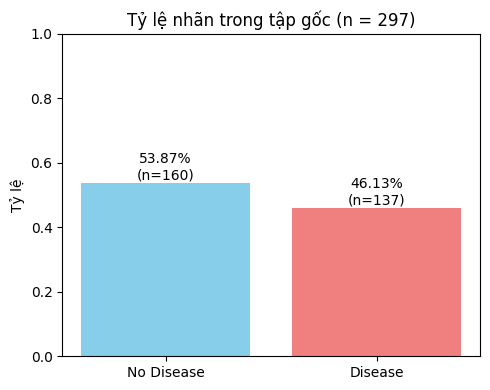

In [12]:
# Tính tỷ lệ và số lượng nhãn trong tập gốc
counts = y.value_counts()
dist = y.value_counts(normalize=True)
labels = ['No Disease', 'Disease']
values = [dist.get(0, 0), dist.get(1, 0)]
n = len(y)

# Vẽ biểu đồ
plt.figure(figsize=(5, 4))
bars = plt.bar(labels, values, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1)
plt.title(f"Tỷ lệ nhãn trong tập gốc (n = {n})")
plt.ylabel("Tỷ lệ")

# Thêm nhãn trên đầu cột
for i, label in enumerate([0, 1]):
    val = values[i]
    count = counts.get(label, 0)
    plt.text(i, val + 0.01, f"{val:.2%}\n(n={count})", ha='center')

plt.tight_layout()
plt.show()


#### b. Visualize cho từng cặp train/test

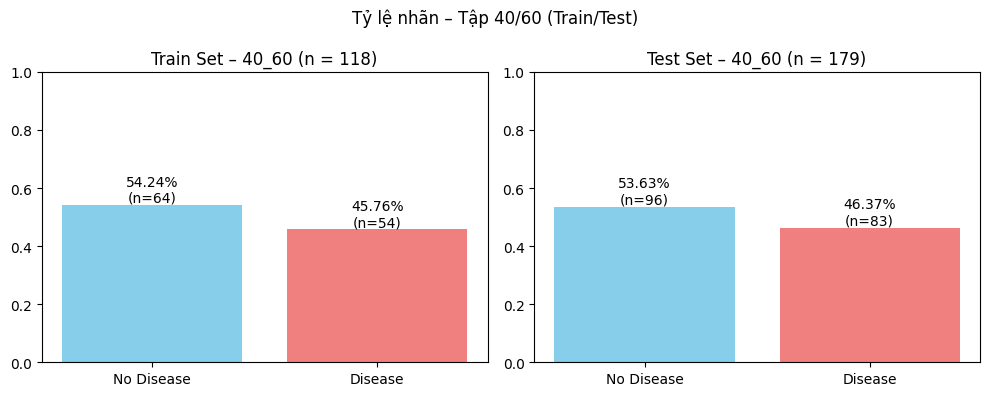

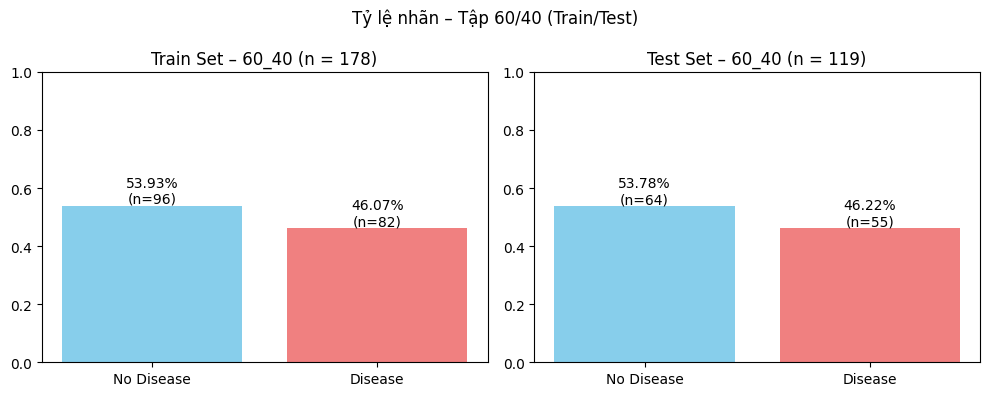

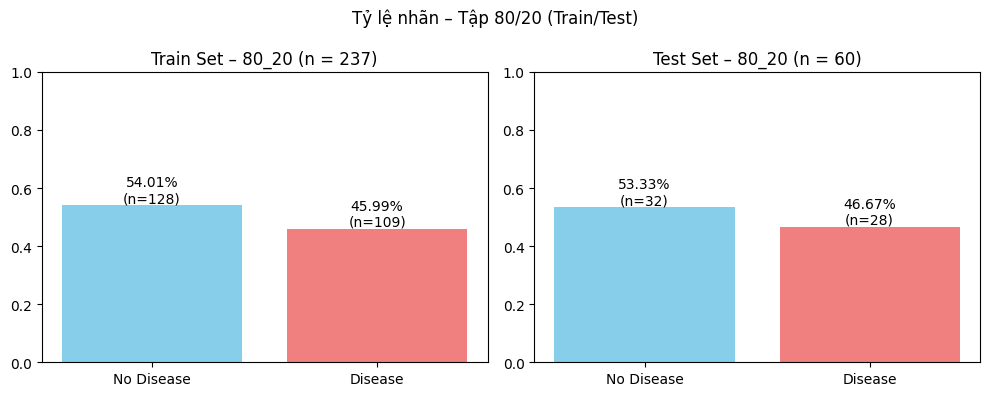

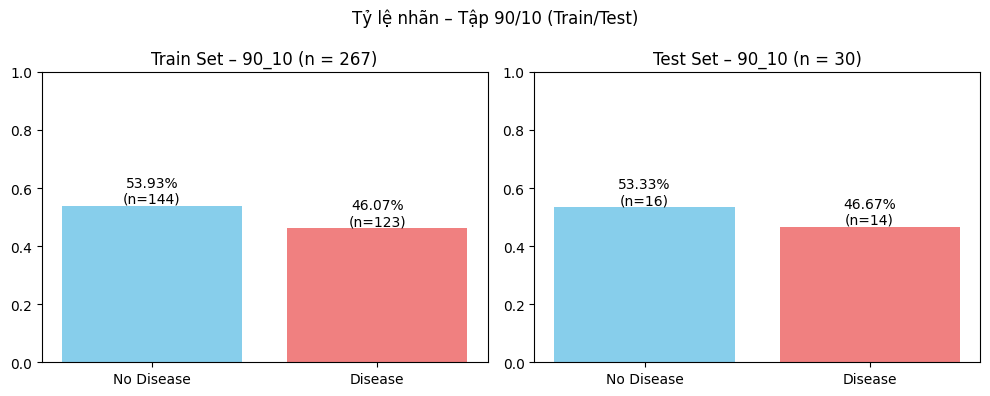

In [13]:
for key, subset in datasets.items():
    y_train = subset['y_train']
    y_test = subset['y_test']

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Train set
    train_counts = y_train.value_counts()
    train_dist = y_train.value_counts(normalize=True)
    train_labels = ['No Disease', 'Disease']
    train_values = [train_dist.get(0, 0), train_dist.get(1, 0)]
    n_train = len(y_train)

    axs[0].bar(train_labels, train_values, color=['skyblue', 'lightcoral'])
    axs[0].set_ylim(0, 1)
    axs[0].set_title(f"Train Set – {key} (n = {n_train})")

    # Hiển thị % và số lượng
    for i, label in enumerate([0, 1]):
        val = train_values[i]
        count = train_counts.get(label, 0)
        axs[0].text(i, val + 0.01, f"{val:.2%}\n(n={count})", ha='center')

    # Test set
    test_counts = y_test.value_counts()
    test_dist = y_test.value_counts(normalize=True)
    test_labels = ['No Disease', 'Disease']
    test_values = [test_dist.get(0, 0), test_dist.get(1, 0)]
    n_test = len(y_test)

    axs[1].bar(test_labels, test_values, color=['skyblue', 'lightcoral'])
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f"Test Set – {key} (n = {n_test})")

    # Hiển thị % và số lượng
    for i, label in enumerate([0, 1]):
        val = test_values[i]
        count = test_counts.get(label, 0)
        axs[1].text(i, val + 0.01, f"{val:.2%}\n(n={count})", ha='center')

    plt.suptitle(f"Tỷ lệ nhãn – Tập {key.replace('_', '/')} (Train/Test)")
    plt.tight_layout()
    plt.show()


# P3: Huấn luyện cây quyết định 

## 1. Build decision tree 


Cây quyết định cho tập 40/60:



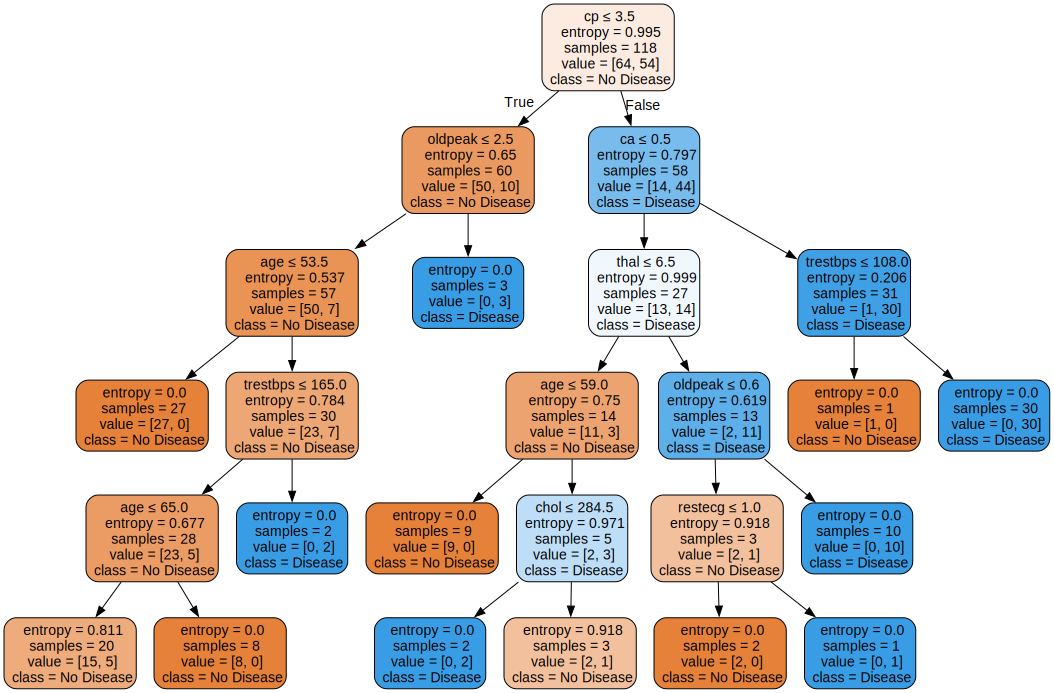


Cây quyết định cho tập 60/40:



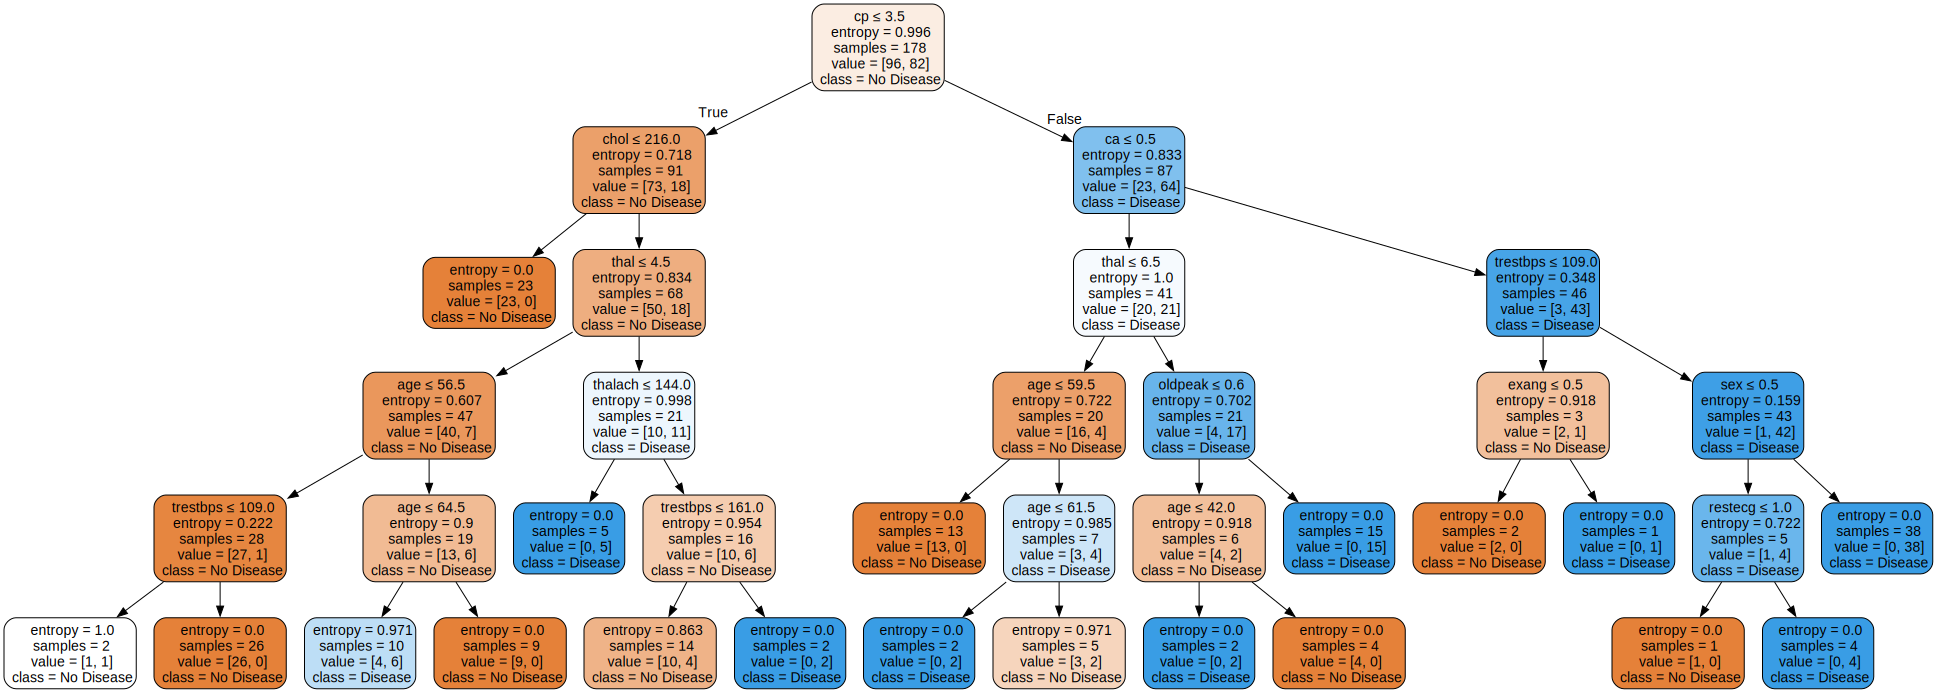


Cây quyết định cho tập 80/20:



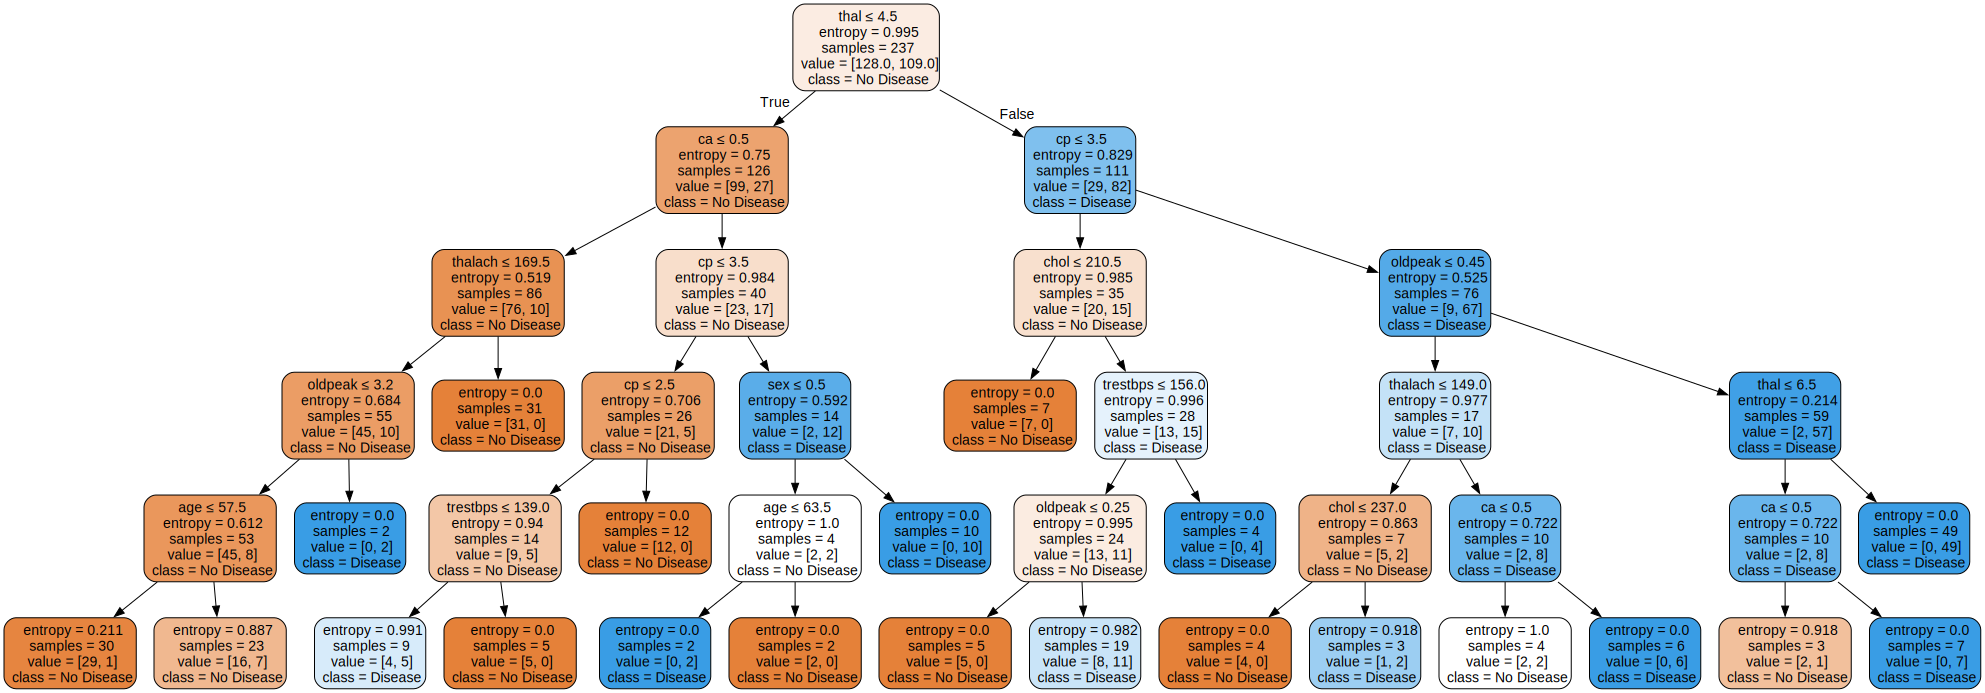


Cây quyết định cho tập 90/10:



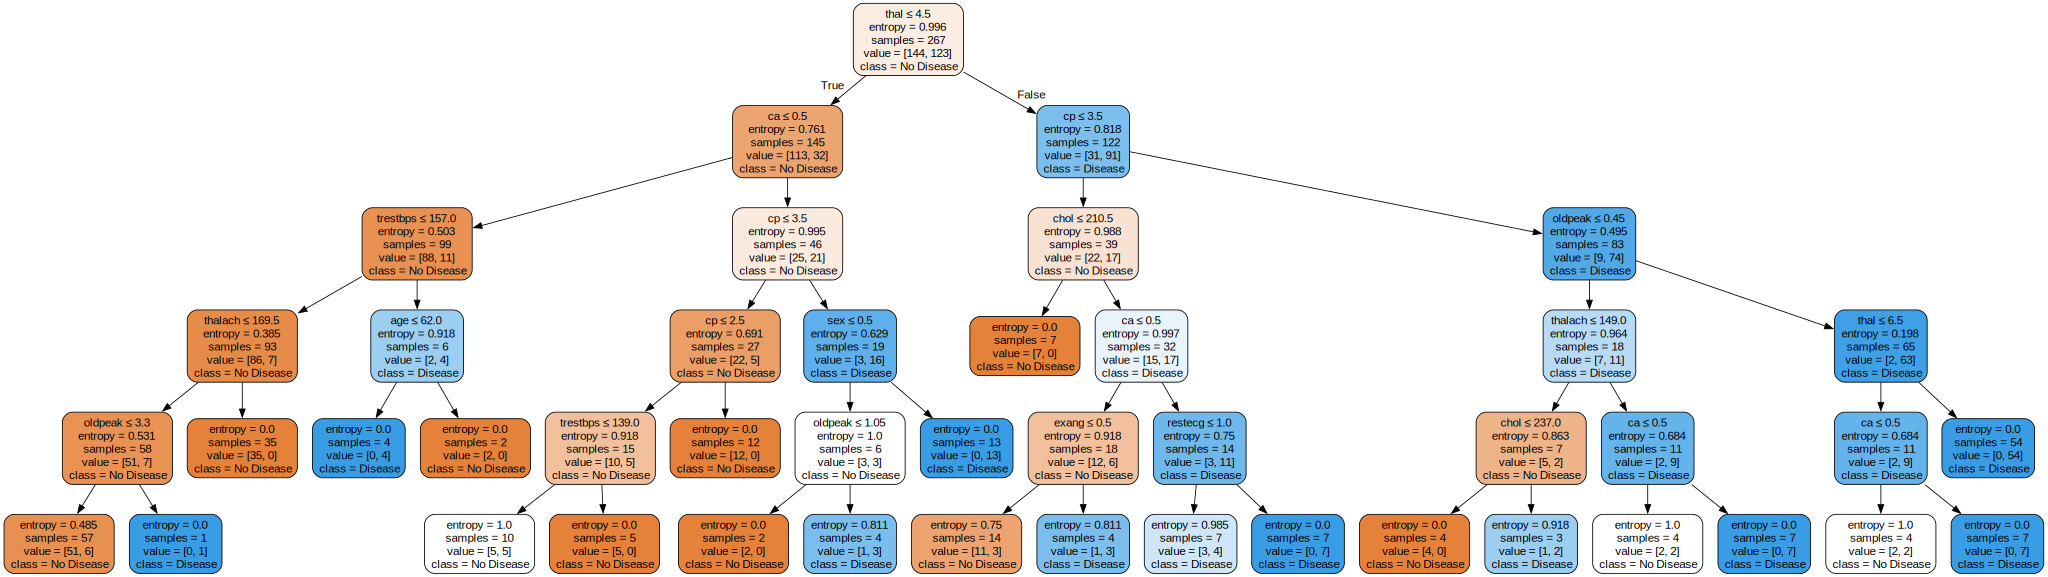

In [14]:
for key, subset in datasets.items(): 
    X_train = subset['X_train']
    y_train = subset['y_train']

    clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
    clf.fit(X_train, y_train)

    dot_data = export_graphviz(clf,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=["No Disease", "Disease"],
                                filled=True, rounded=True,
                                special_characters=True)
    graph = graphviz.Source(dot_data)
    print(f"\nCây quyết định cho tập {key.replace('_', '/')}:\n")
    display(graph)


## 2. Đánh giá mô hình và hiển thị confusion matrix 


ĐÁNH GIÁ MÔ HÌNH VỚI TỶ LỆ 40/60

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.80        96
     Disease       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix (bảng):
[[79 17]
 [23 60]]


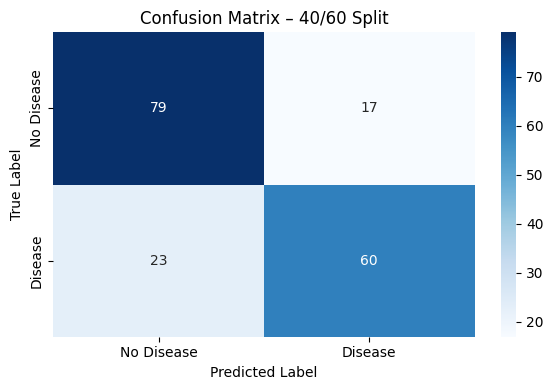


ĐÁNH GIÁ MÔ HÌNH VỚI TỶ LỆ 60/40

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.72      0.86      0.79        64
     Disease       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119

Confusion Matrix (bảng):
[[55  9]
 [21 34]]


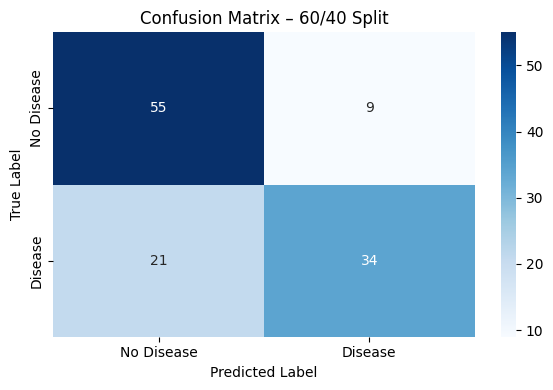


ĐÁNH GIÁ MÔ HÌNH VỚI TỶ LỆ 80/20

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.75      0.77        32
     Disease       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Confusion Matrix (bảng):
[[24  8]
 [ 6 22]]


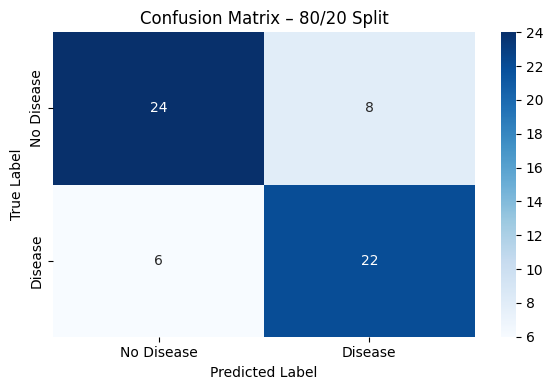


ĐÁNH GIÁ MÔ HÌNH VỚI TỶ LỆ 90/10

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.68      0.81      0.74        16
     Disease       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30

Confusion Matrix (bảng):
[[13  3]
 [ 6  8]]


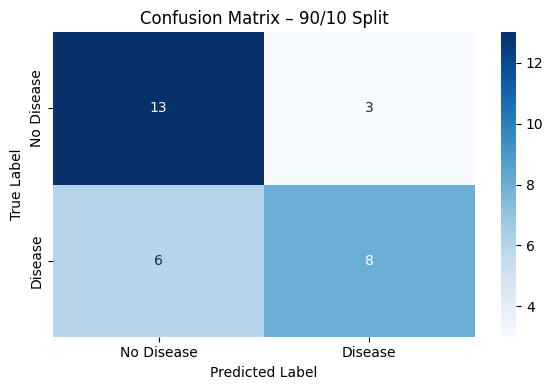

In [19]:
for key, subset in datasets.items():
    print(f"\nĐÁNH GIÁ MÔ HÌNH VỚI TỶ LỆ {key.replace('_', '/')}")

    X_train = subset['X_train']
    y_train = subset['y_train']
    X_test = subset['X_test']
    y_test = subset['y_test']

    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #  Classification report với nhãn tên cụ thể
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

    # Confusion matrix (bảng số)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (bảng):")
    print(cm)

    # Vẽ heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix – {key.replace('_', '/')} Split")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


# P4: So sánh theo max_depth 

## 1. Huấn luyện mô hình với max_depth   

In [16]:
X_train = datasets['80_20']['X_train']
y_train = datasets['80_20']['y_train']
X_test = datasets['80_20']['X_test']
y_test = datasets['80_20']['y_test']


depth_list = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = []

for depth in depth_list:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append((depth, acc))
    print(f"max_depth = {depth}, accuracy = {acc:.2f}")


max_depth = None, accuracy = 0.77
max_depth = 2, accuracy = 0.72
max_depth = 3, accuracy = 0.82
max_depth = 4, accuracy = 0.77
max_depth = 5, accuracy = 0.77
max_depth = 6, accuracy = 0.73
max_depth = 7, accuracy = 0.77


## 2. Build decision tree  


Cây quyết định (depth = None):



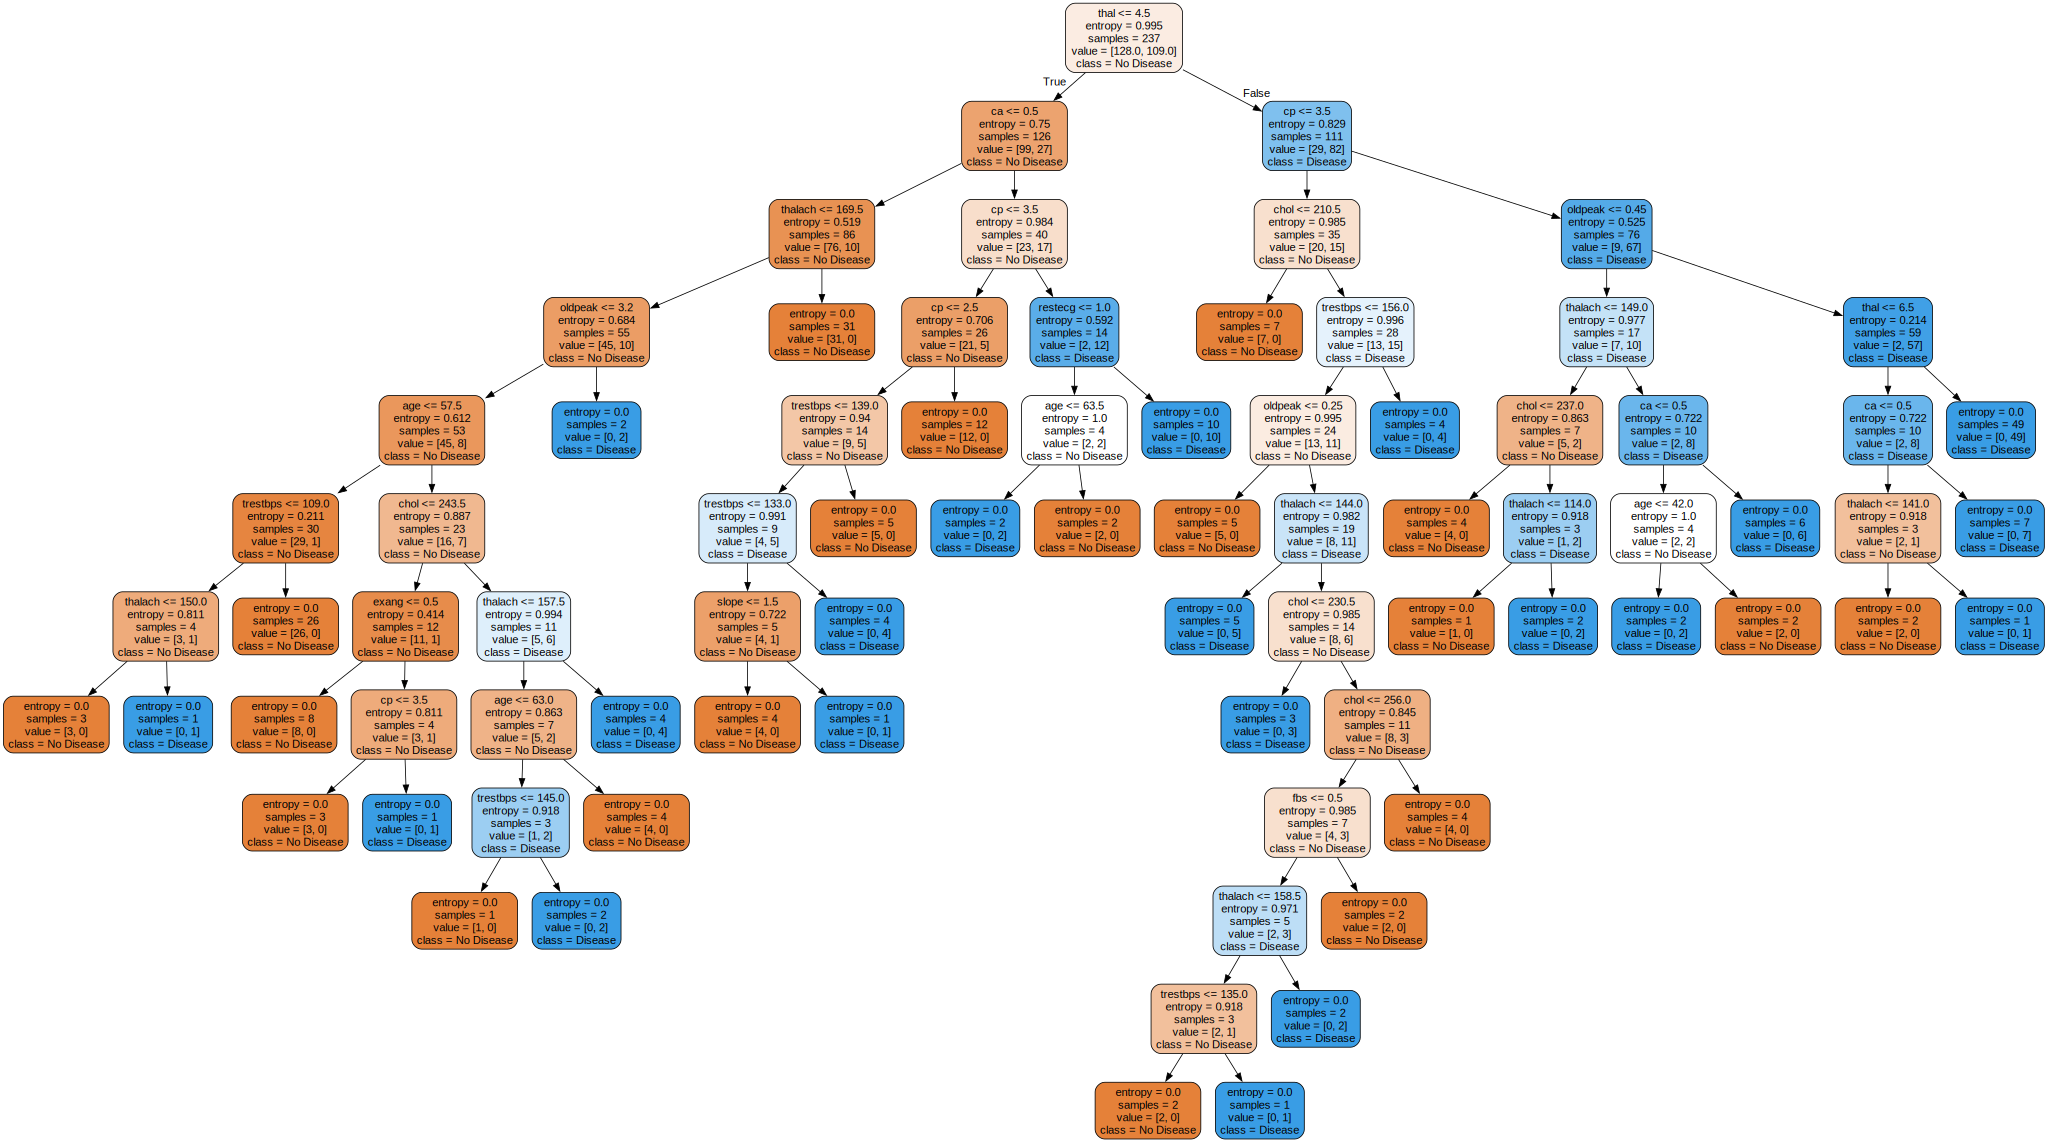


Cây quyết định (depth = 2):



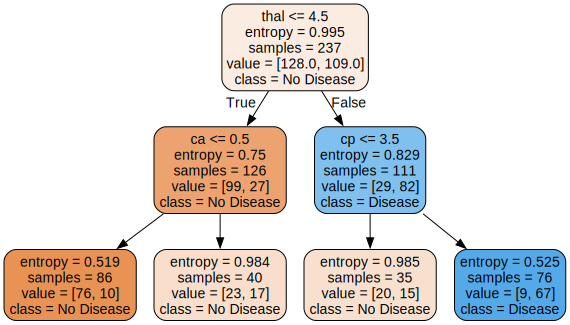


Cây quyết định (depth = 3):



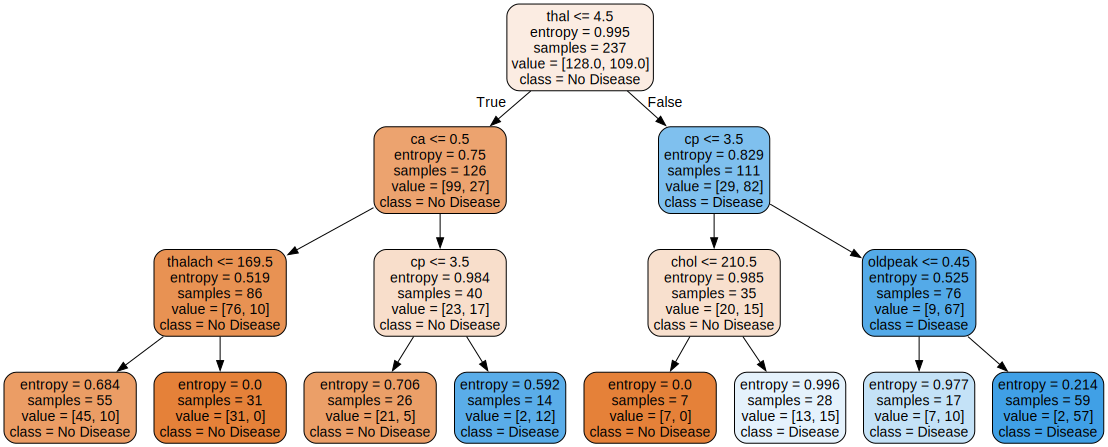


Cây quyết định (depth = 4):



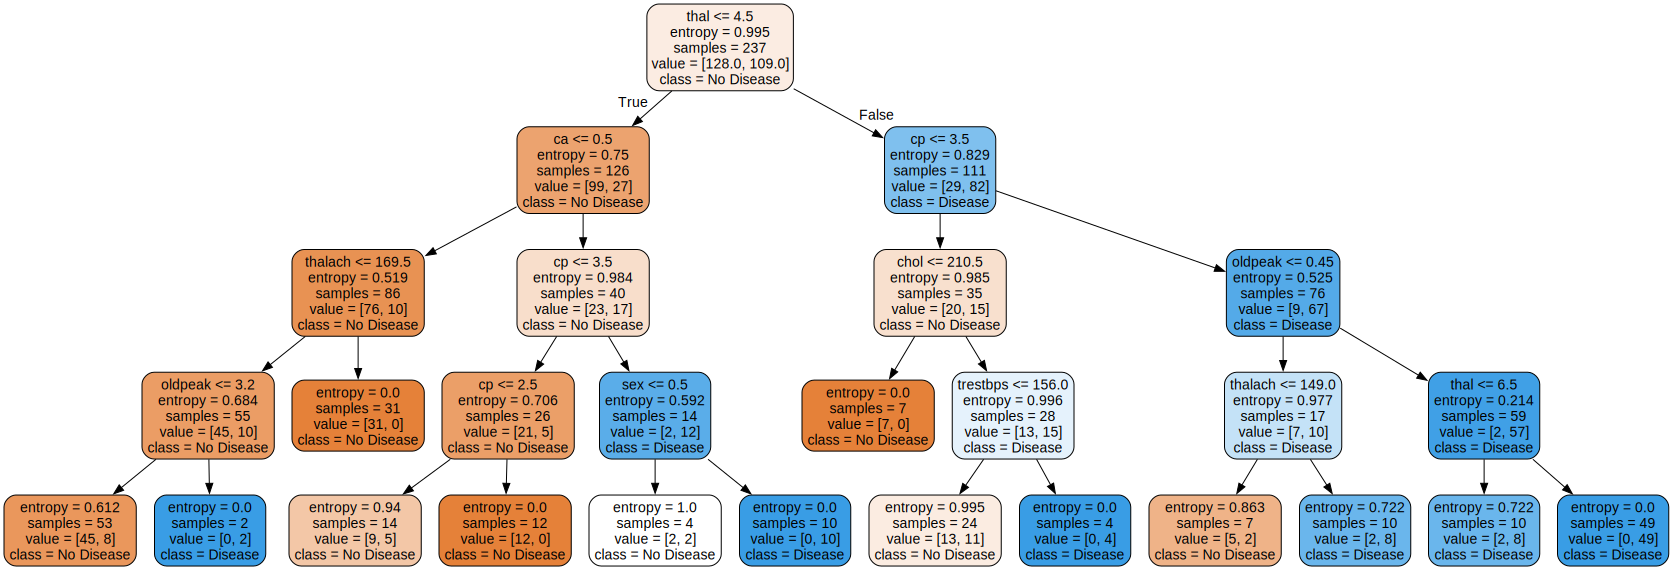


Cây quyết định (depth = 5):



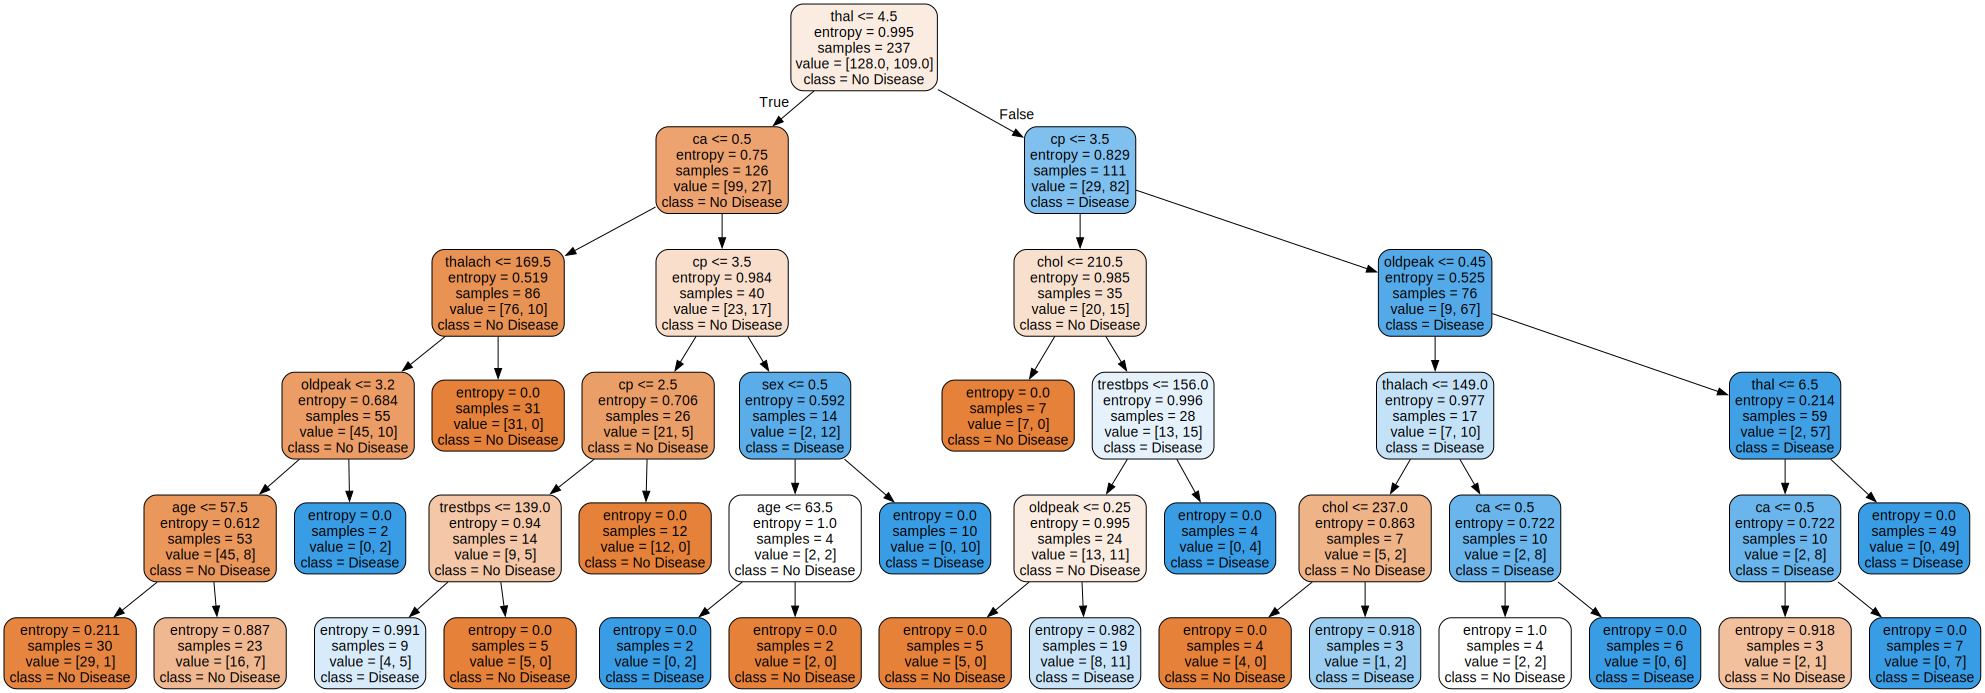


Cây quyết định (depth = 6):



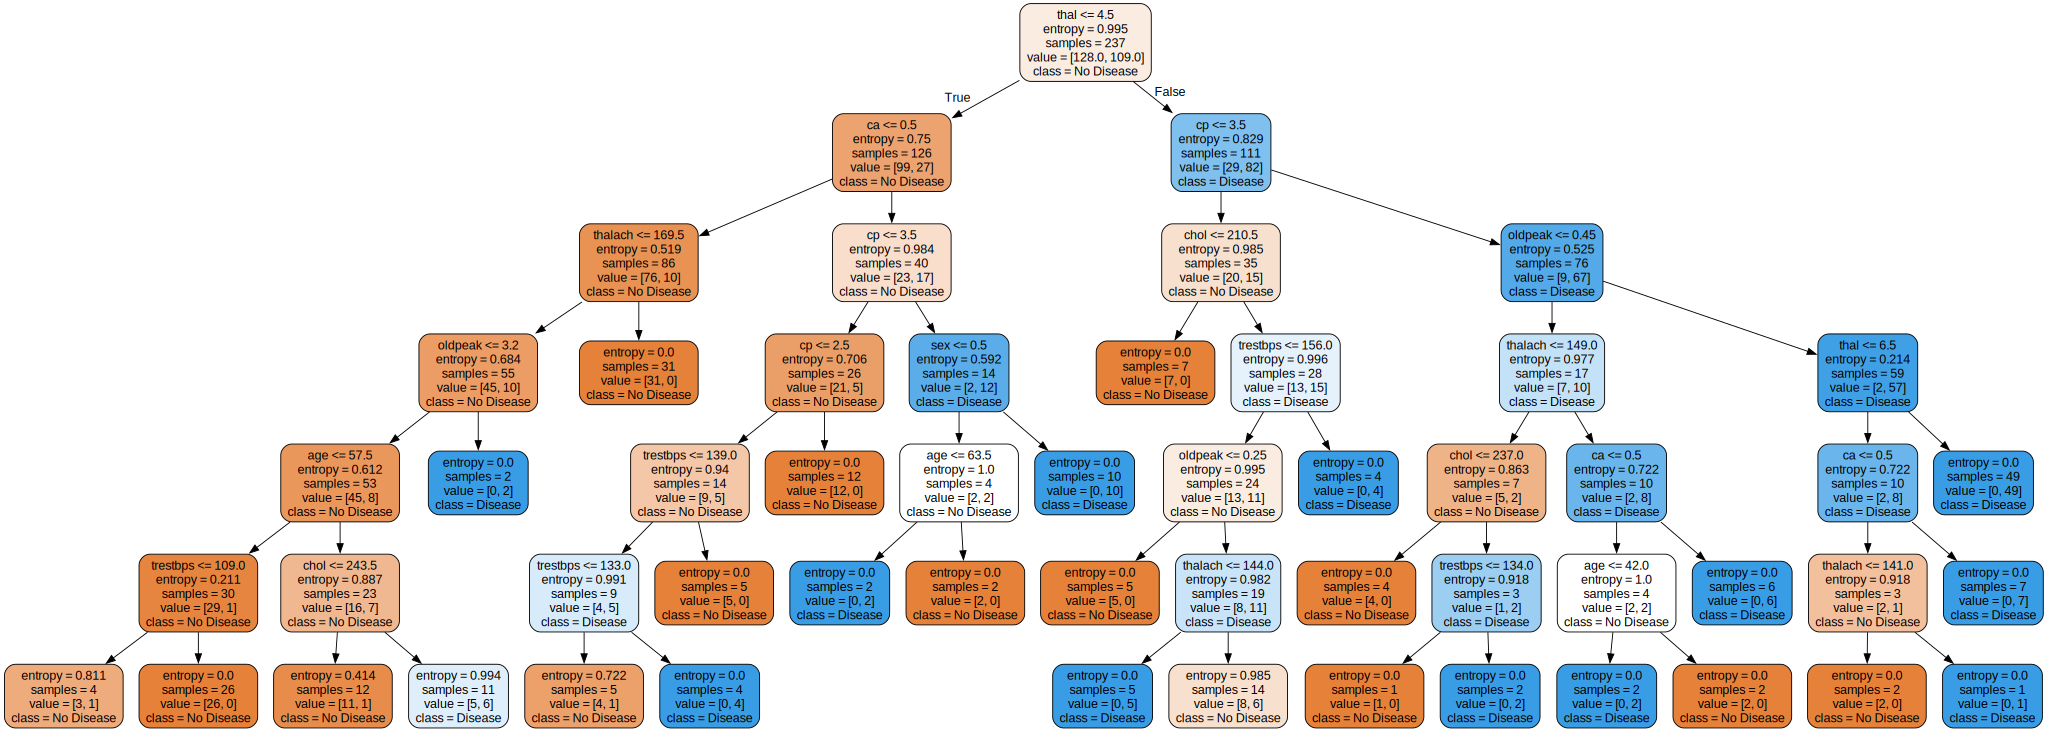


Cây quyết định (depth = 7):



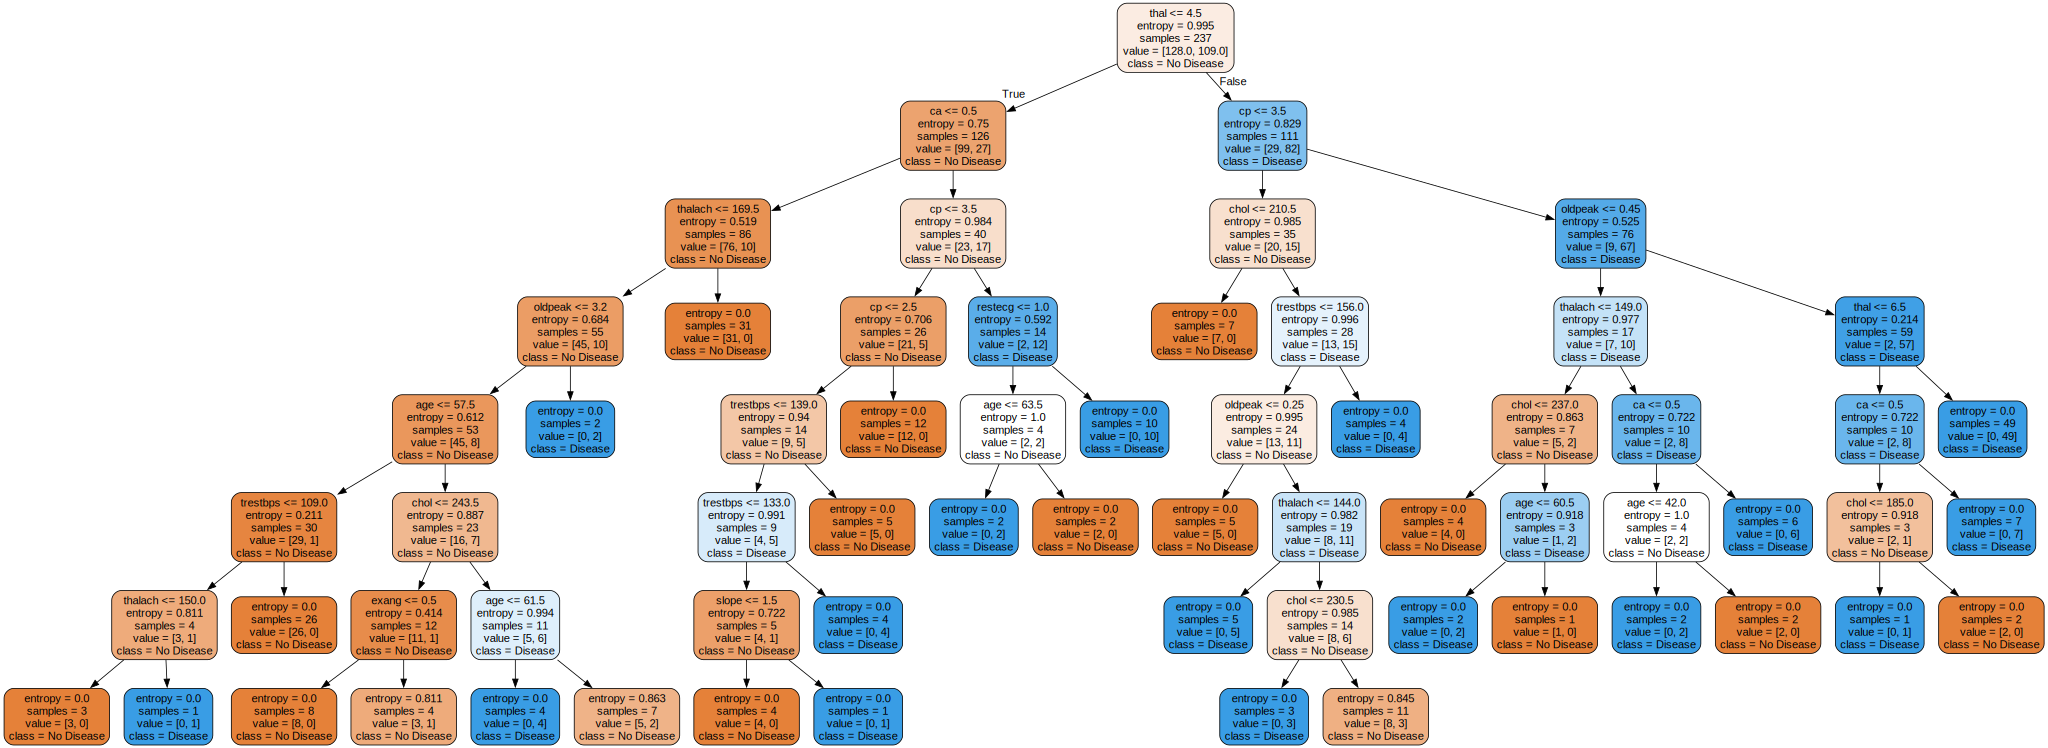

In [17]:
for depth in depth_list:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    dot_data = export_graphviz(clf,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=["No Disease", "Disease"],
                                filled=True, rounded=True)
    
    graph = graphviz.Source(dot_data)
    name = f"tree_depth_None" if depth is None else f"tree_depth_{depth}"
    print(f"\nCây quyết định (depth = {depth}):\n")
    display(graph)

## 3. Ghi lại accuracy  

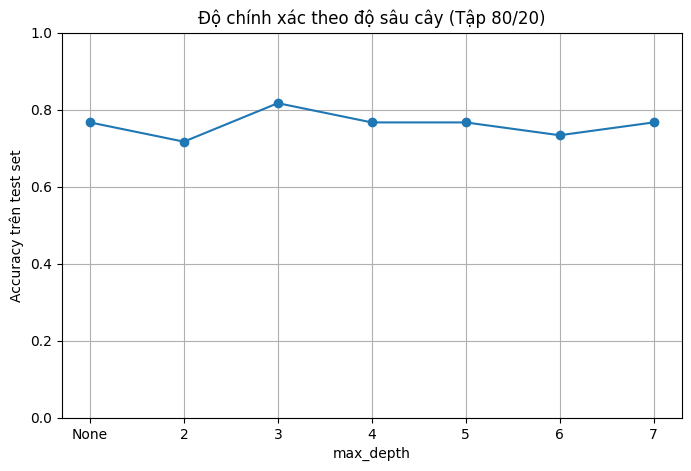


 Bảng thống kê accuracy:


max_depth,None,2,3,4,5,6,7
accuracy,0.7667,0.7167,0.8167,0.7667,0.7667,0.7333,0.7667


In [18]:
depth_labels = ['None' if d is None else str(d) for d, _ in accuracy_results]
acc_values = [acc for _, acc in accuracy_results]

plt.figure(figsize=(8, 5))
plt.plot(depth_labels, acc_values, marker='o')
plt.title("Độ chính xác theo độ sâu cây (Tập 80/20)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy trên test set")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Bảng thống kê accuracy
df_acc = pd.DataFrame(accuracy_results, columns=["max_depth", "accuracy"])
df_acc["accuracy"] = df_acc["accuracy"].round(4)


df_acc["max_depth"] = df_acc["max_depth"].apply(lambda x: "None" if pd.isna(x) else int(x))

df_row_table = df_acc.set_index("max_depth").T

print("\n Bảng thống kê accuracy:")
display(df_row_table)


